Importing Libraries and Extracting the file

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [5]:
df=pd.read_csv("F:\ML projects\Garment\garments_worker_productivity.csv")
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,01-01-2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,01-01-2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,01-01-2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,01-01-2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,01-01-2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [6]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


Data Preprocessing

In [7]:
df2 = df.drop(['date', 'day'], axis=1)
df2.shape

(1197, 13)

In [8]:
df2.isnull().sum()

quarter                    0
department                 0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [12]:
df3=df2.fillna({"wip":0,})
df3.isnull().sum()

quarter                  0
department               0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

Outlier detection and removal

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'team'),
  Text(1, 0, 'targeted_productivity'),
  Text(2, 0, 'smv'),
  Text(3, 0, 'wip'),
  Text(4, 0, 'over_time'),
  Text(5, 0, 'incentive'),
  Text(6, 0, 'idle_time'),
  Text(7, 0, 'idle_men'),
  Text(8, 0, 'no_of_style_change'),
  Text(9, 0, 'no_of_workers'),
  Text(10, 0, 'actual_productivity')])

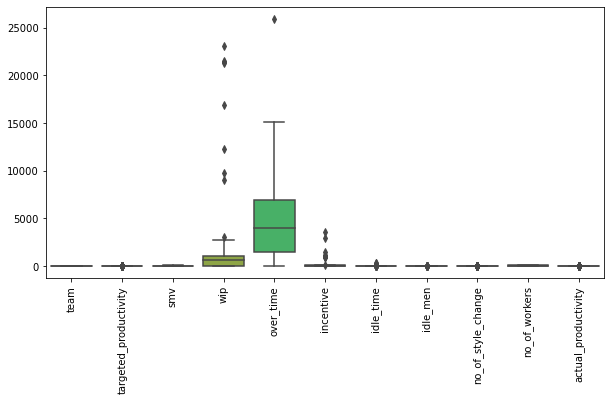

In [13]:
plt.figure(figsize=(10,5))
p = sns.boxplot(data = df3, orient ='v',width=0.8)
plt.xticks(rotation=90)

In [14]:
Q1 = df3.incentive.quantile(0.25)
Q3 = df3.incentive.quantile(0.75)
print(Q1, Q3)
IQR = Q3 - Q1
IQR
print("IQR: ",IQR)

0.0 50.0
IQR:  50.0


In [15]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print("lower limit: ",lower_limit)
print("upper_limit: ",upper_limit)

lower limit:  -75.0
upper_limit:  125.0


In [16]:
df3[(df3.incentive<lower_limit)|(df3.incentive>upper_limit)]
df3.head()

,quarter,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [17]:
df4 = df3[(df3.incentive>lower_limit)&(df3.incentive<upper_limit)]
df4.head()

,quarter,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


Removing Outliers for 'wip' column

In [18]:
Q1 = df4.wip.quantile(0.25)
Q3 = df4.wip.quantile(0.75)
Q1, Q3
IQR = Q3 - Q1
IQR

1084.75

In [19]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-1627.125, 2711.875)

In [21]:
df4[(df4.wip<lower_limit)|(df4.wip>upper_limit)]


,quarter,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
561,Quarter1,sweing,1,0.80,22.94,16882.0,7020,113,0.0,0,0,58.5,1.000602
563,Quarter1,sweing,2,0.80,22.52,21385.0,7020,88,0.0,0,0,58.5,0.900158
564,Quarter1,sweing,3,0.80,22.52,21266.0,6840,70,0.0,0,0,57.0,0.900142
565,Quarter1,sweing,10,0.80,22.52,21540.0,6720,88,0.0,0,0,56.0,0.900130
568,Quarter1,sweing,12,0.80,15.26,12261.0,3600,63,0.0,0,0,35.0,0.800402
569,Quarter1,sweing,4,0.80,22.52,23122.0,5940,50,0.0,0,0,56.5,0.800393
570,Quarter1,sweing,9,0.75,29.12,8992.0,6960,55,0.0,0,0,58.0,0.799963
572,Quarter1,sweing,11,0.70,20.55,9792.0,6480,60,0.0,0,0,54.0,0.700398
573,Quarter1,sweing,6,0.70,18.79,2984.0,3960,30,0.0,0,0,33.0,0.700355


In [22]:
df5 = df4[(df4.wip>lower_limit)&(df4.wip<upper_limit)]
df5.shape

(1177, 13)

Removing Outliers for 'over_time' column

In [23]:
Q1 = df5.over_time.quantile(0.25)
Q3 = df5.over_time.quantile(0.75)
Q1, Q3
IQR = Q3 - Q1
IQR

5520.0

In [24]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-6840.0, 15240.0)

In [25]:
df5[(df5.over_time<lower_limit)|(df5.over_time>upper_limit)]

,quarter,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
146,Quarter2,sweing,11,0.35,12.52,287.0,25920,38,0.0,0,0,54.0,0.349951


In [26]:
df6 = df5[(df5.over_time>lower_limit)&(df5.over_time<upper_limit)]
df6.shape

(1176, 13)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'team'),
  Text(1, 0, 'targeted_productivity'),
  Text(2, 0, 'smv'),
  Text(3, 0, 'wip'),
  Text(4, 0, 'over_time'),
  Text(5, 0, 'incentive'),
  Text(6, 0, 'idle_time'),
  Text(7, 0, 'idle_men'),
  Text(8, 0, 'no_of_style_change'),
  Text(9, 0, 'no_of_workers'),
  Text(10, 0, 'actual_productivity')])

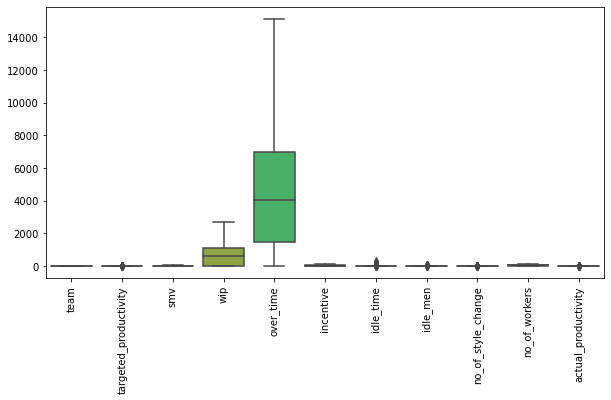

In [27]:
plt.figure(figsize=(10,5))
p = sns.boxplot(data = df6, orient ='v',width=0.8)
plt.xticks(rotation=90)

Encoding & Scaling

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [29]:
for i in range(0, df6.shape[1]):
    if df6.dtypes[i]=='object':
        df6[df6.columns[i]] = le.fit_transform(df6[df6.columns[i]])

<ipython-input-29-eee4dbf14807>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6[df6.columns[i]] = le.fit_transform(df6[df6.columns[i]])


In [30]:
df6.head()

,quarter,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,2,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,0,1,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,0,2,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,0,2,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,0,2,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [31]:
x = df6.drop(['actual_productivity'], axis=1)
y = df6.actual_productivity

In [32]:
x.shape, y.shape

((1176, 12), (1176,))

In [33]:
y.head()

0    0.940725
1    0.886500
2    0.800570
3    0.800570
4    0.800382
Name: actual_productivity, dtype: float64

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [35]:
x.iloc[:,:] = scaler.fit_transform(x.iloc[:,:])
x.head()

,quarter,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,-1.160117,0.780739,0.455616,0.720481,1.008608,0.926217,0.760786,2.413020,-0.057985,-0.114022,-0.355135,1.097504
1,-1.160117,-0.468444,-1.571751,0.209020,-1.018120,-1.019391,-1.102067,-0.847073,-0.057985,-0.114022,-0.355135,-1.201499
2,-1.160117,0.780739,1.324487,0.720481,-0.336767,0.680382,-0.280220,0.816240,-0.057985,-0.114022,-0.355135,-0.187233
3,-1.160117,0.780739,1.614110,0.720481,-0.336767,0.680382,-0.280220,0.816240,-0.057985,-0.114022,-0.355135,-0.187233
4,-1.160117,0.780739,-0.123632,0.720481,0.984893,1.035087,-0.809855,0.816240,-0.057985,-0.114022,-0.355135,0.962269


Train Test Split

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(823, 12)
(353, 12)
(823,)
(353,)


Implementing ML Algorithms

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

In [38]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [39]:
pred_linreg = linreg.predict(x_test)
print("MAE  :", mean_absolute_error(y_test, pred_linreg))
print("MSE  :", mean_squared_error(y_test, pred_linreg))
print("RMSE :",sqrt(mean_squared_error(y_test, pred_linreg)))
print("MAPE :",mean_absolute_percentage_error(y_test, pred_linreg))

MAE  : 0.09173433300344526
MSE  : 0.017312345347207
RMSE : 0.1315763859786664
MAPE : 0.15269988612491078


In [40]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
print("MAE  :", mean_absolute_error(y_test, pred_knn))
print("MSE  :", mean_squared_error(y_test, pred_knn))
print("RMSE :",sqrt(mean_squared_error(y_test, pred_knn)))
print("MAPE :",mean_absolute_percentage_error(y_test, pred_knn))

MAE  : 0.08074493312181304
MSE  : 0.015494944501443736
RMSE : 0.1244786909532862
MAPE : 0.13791936483714168


In [41]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
pred_svr = svr.predict(x_test)
print("MAE  :", mean_absolute_error(y_test, pred_svr))
print("MSE  :", mean_squared_error(y_test, pred_svr))
print("RMSE :",sqrt(mean_squared_error(y_test, pred_svr)))
print("MAPE :",mean_absolute_percentage_error(y_test, pred_svr))

MAE  : 0.08540142485916467
MSE  : 0.014762623042367995
RMSE : 0.12150153514407953
MAPE : 0.14502184600081777


In [42]:

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
print("MAE  :", mean_absolute_error(y_test, pred_dt))
print("MSE  :", mean_squared_error(y_test, pred_dt))
print("RMSE :",sqrt(mean_squared_error(y_test, pred_dt)))
print("MAPE :",mean_absolute_percentage_error(y_test, pred_dt))

MAE  : 0.08336093377289897
MSE  : 0.021982381418422587
RMSE : 0.14826456561978182
MAPE : 0.13731669891431925


In [43]:
from sklearn.ensemble import RandomForestRegressor
randf = RandomForestRegressor(random_state=42)
randf.fit(x_train,y_train)
pred_randf = randf.predict(x_test)
print("MAE  :", mean_absolute_error(y_test, pred_randf))
print("MSE  :", mean_squared_error(y_test, pred_randf))
print("RMSE :",sqrt(mean_squared_error(y_test, pred_randf)))
print("MAPE :",mean_absolute_percentage_error(y_test, pred_randf))

MAE  : 0.0719957216230151
MSE  : 0.013572202605250796
RMSE : 0.11649979658888163
MAPE : 0.12026126875619622


In [44]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=42)
gb.fit(x_train,y_train)
pred_gb = gb.predict(x_test)
print("MAE  :", mean_absolute_error(y_test, pred_gb))
print("MSE  :", mean_squared_error(y_test, pred_gb)) 
print("RMSE :",sqrt(mean_squared_error(y_test, pred_gb)))
print("MAPE :",mean_absolute_percentage_error(y_test, pred_gb))

MAE  : 0.0754305131195305
MSE  : 0.012737341468008395
RMSE : 0.11285983106494708
MAPE : 0.1267789323989287


In [45]:
from sklearn.ensemble import AdaBoostRegressor
adab = AdaBoostRegressor(random_state=42)
adab.fit(x_train,y_train)
pred_adab = adab.predict(x_test)
print("MAE  :", mean_absolute_error(y_test, pred_adab))
print("MSE  :", mean_squared_error(y_test, pred_adab)) 
print("RMSE :",sqrt(mean_squared_error(y_test, pred_adab)))
print("MAPE :",mean_absolute_percentage_error(y_test, pred_adab))

MAE  : 0.09400854607094812
MSE  : 0.017259556332085164
RMSE : 0.13137563066293978
MAPE : 0.1501031395379779


In [49]:
!pip install xgboost

In [50]:
import xgboost
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train, y_train)
pred_xgb = xgb.predict(x_test)
print("MAE  :", mean_absolute_error(y_test, pred_xgb))
print("MSE  :", mean_squared_error(y_test, pred_xgb)) 
print("RMSE :",sqrt(mean_squared_error(y_test, pred_xgb)))
print("MAPE :",mean_absolute_percentage_error(y_test, pred_xgb))

MAE  : 0.07754761167958418
MSE  : 0.017137848183492375
RMSE : 0.1309116044645866
MAPE : 0.12409310258113149


Saving files

In [51]:
import joblib as jb
jb.dump(linreg,'linReg')
jb.dump(knn,'knn')
jb.dump(svr,'svr')
jb.dump(dt,'dt')
jb.dump(randf,'randf')
jb.dump(gb,'gb')
jb.dump(adab,'adab')
jb.dump(xgb,'xgb')

['xgb']

In [52]:
import joblib as jb
linreg_default =  jb.load('linReg')
knn_default = jb.load('knn')
svr_default = jb.load('svr')
dt_default =  jb.load('dt')
randf_default =  jb.load('randf')
gb_default =  jb.load('gb')
adab_default =  jb.load('adab')
xgb_default =  jb.load('xgb')

Summery of Evaluation Metrics

In [53]:
d = {'Algorithm': ['Linear Regression','K Nearest Neighbors', 'Support Vector Machine','Decision Tree',
                   'Random Forest','Gradient Boost','Adaboost','XGBoost'],
     'MSE' : [0.017,0.015,0.014,0.022,0.013, 0.012,0.017,0.015],
     'RMSE': [0.131, 0.123, 0.121,0.148,0.116,0.112,0.131,0.123],
     'MAE' : [0.091,0.079,0.084,0.083,0.072,0.075,0.094,0.078],
     'MAPE': [15.30,13.65,14.43,13.78,12.02,12.67,15.01,12.62]
    }
df_accuracy = pd.DataFrame(data=d)
df_accuracy

,Algorithm,MSE,RMSE,MAE,MAPE
0,Linear Regression,0.017,0.131,0.091,15.30
1,K Nearest Neighbors,0.015,0.123,0.079,13.65
2,Support Vector Machine,0.014,0.121,0.084,14.43
3,Decision Tree,0.022,0.148,0.083,13.78
4,Random Forest,0.013,0.116,0.072,12.02
5,Gradient Boost,0.012,0.112,0.075,12.67
6,Adaboost,0.017,0.131,0.094,15.01
7,XGBoost,0.015,0.123,0.078,12.62
